In [1]:
import numpy as np
import func
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
N=100
P=5
M=2
weight=[ 1/2  , 1/2 ]
mean=  [  -1.5  ,  1.5 ]
covs=  [  0.5 , 0.5 ]#标准差
Theta=np.array([weight,mean,covs])
np.random.seed(123)
betat=0.5*np.random.rand(5)+0.5
betat,Theta

(array([0.84823459, 0.64306967, 0.61342573, 0.77565738, 0.85973448]),
 array([[ 0.5,  0.5],
        [-1.5,  1.5],
        [ 0.5,  0.5]]))

In [3]:
sampleY=np.load('sampleY.npy')#sampleY[i,j]表示第i次实验第j个样本的响应变量
sampleX=np.load('sampleX.npy')#sampleX[i,j,k]表示第i次实验第j个样本的第h个分量
Betares=np.load('Betares.npy')#Betares[i]表示第i次实验的所有样本估计所得的beta
Thetares=np.load('Thetares.npy')#Thetares[i]表示第i次实验的所有样本估计所得的Theta
sgroup=np.load('sgroup.npy')#sgroup[i,j]表示第i次实验第j个样本的真实亚组

In [4]:
bias=np.zeros((100,100))#bias[i,j]表示第i次实验第j个样本的真实值与预测值的偏差
for i in range(100):
    bias[i]=sampleY[i]-np.dot(sampleX[i],Betares[i])

In [5]:
predgroup=np.zeros((100,100,M))#predgroup[i,j,h]表示第i次实验第j个样本属于第h组的后验概率
for i in range(100):
    predgroup[i]=func.Lih(bias[i],Thetares[i])

In [6]:
predclass=np.zeros((100,100))#predclass[i,j]表示第i次实验第j个样本的预测类别
for i in range(100):
    for j in range(100):
        predclass[i,j]=predgroup[i,j].argmax()

In [7]:
np.save('predclass.npy',predclass)#sgroup[i,j]表示第i次实验第j个样本的真实亚组

In [8]:
predmu=np.zeros((100,100))
smu=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        predmu[i,j]=4*(predclass[i,j])-2
        smu[i,j]=4*(sgroup[i,j])-2

In [9]:
RMSEofMu=np.zeros(100)
for i in range(100):
    RMSEofMu[i]=np.sqrt(np.linalg.norm(predmu[i]-smu[i]))/(np.sqrt(100))

In [10]:
np.save('RMSEofMu.npy',RMSEofMu)

In [11]:
RMSEofbeta=np.zeros(100)
for i in range(100):
    RMSEofbeta[i]=np.sqrt(np.linalg.norm(Betares[i]-betat))/(np.sqrt(100))

In [12]:
np.save('RMSEofbeta.npy',RMSEofbeta)

In [13]:
'''
#这里直接读取回来，不必要重新运算
predclass=np.load('predclass.npy')
RMSEofMu=np.load('RMSEofMu.npy')
RMSEofbeta=np.load('RMSEofbeta.npy')
'''

"\n#这里直接读取回来，不必要重新运算\npredclass=np.load('predclass.npy')\nRMSEofMu=np.load('RMSEofMu.npy')\nRMSEofbeta=np.load('RMSEofbeta.npy')\n"

In [14]:
#1000次实验mu和beta估计的RMSE的均值
np.mean(RMSEofMu),np.mean(RMSEofbeta)

(0.03875682846001089, 0.035418229246311654)

标准误差（英文：Standard Error），也称标准误，即样本平均数抽样分布的标准差（英文：Standard Deviation），是描述对应的样本平均数抽样分布的离散程度及衡量对应样本平均数抽样误差大小的尺度

In [15]:
np.std(RMSEofMu),np.std(RMSEofbeta)

(0.08018278554415383, 0.006691006573752609)

In [16]:
#1000次实验的每次正确率
Cratio=np.zeros((100,100))#Cratio[i,j]表示第i次实验第j个样本是否预测正确
for i in range(100):
    for j in range(100):
        if predclass[i,j]==sgroup[i,j]:
            Cratio[i,j]=1
cr=np.sum(Cratio,axis=1)/100

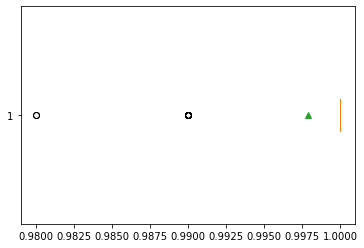

In [17]:
plt.boxplot(cr,vert=False,showmeans=True )
plt.show()

In [18]:
#1000次实验的RI index（兰德系数，表示聚类精度）
RIindex=np.zeros(100)
for i in range(100):
    RIindex[i]=rand_score(sgroup[i],predclass[i])

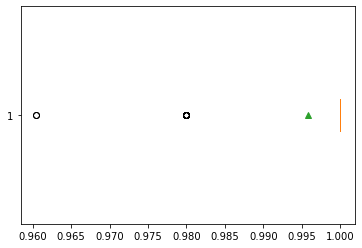

In [19]:
plt.boxplot(RIindex,vert=False,showmeans=True )
plt.show()

In [20]:
np.mean(Betares,axis=0),np.mean(Thetares,axis=0)

(array([0.83822737, 0.62970806, 0.60952302, 0.77683531, 0.86209397]),
 array([[ 0.50206866,  0.49793134],
        [-1.49578175,  1.50672678],
        [ 0.48328089,  0.48611055]]))

In [21]:
np.var(Betares,axis=0),np.var(Thetares,axis=0)

(array([0.00463697, 0.00382364, 0.004105  , 0.00231889, 0.00403276]),
 array([[0.00251835, 0.00251835],
        [0.00605574, 0.00521967],
        [0.00361893, 0.00336057]]))

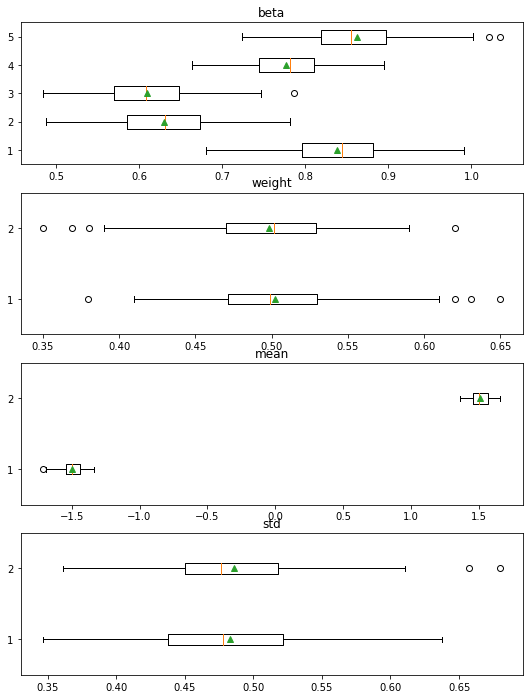

In [22]:
fig = plt.figure(figsize=(9,12))
ax0 = fig.add_subplot(411)
ax0.boxplot(Betares,vert=False,showmeans=True )
ax1 = fig.add_subplot(412)
ax1.boxplot(Thetares[:,0,:],vert=False,showmeans=True )
ax2 = fig.add_subplot(413)
ax2.boxplot(Thetares[:,1,:],vert=False,showmeans=True )
ax3 = fig.add_subplot(414)
ax3.boxplot(Thetares[:,2,:],vert=False,showmeans=True )
ax0.title.set_text('beta')
ax1.title.set_text('weight')
ax2.title.set_text('mean')
ax3.title.set_text('std')
plt.show()#显示图像